# Introduction aux Probabilités et Statistiques

Nous allons maintenant manipuler des données et faire des statistiques

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Variables aléatoires et distributions
Commençons par créer un échantillon de 30 valeurs d'une distribution uniforme de 0 à 11. Nous allons aussi calculer la moyenne et la variance.


In [13]:
echantillon = [ random.randint(0,11) for _ in range(30) ]
print(f"Echantillon: {echantillon}")
print(f"Moyenne = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Echantillon: [3, 7, 5, 5, 8, 10, 4, 3, 7, 10, 2, 2, 2, 11, 6, 8, 8, 6, 0, 3, 5, 11, 5, 0, 9, 11, 5, 0, 5, 2]
Moyenne = 5.8
Variance = 10.960000000000003


Pour visualiser la distribution, nous pouvons utiliser un **histogramme**:



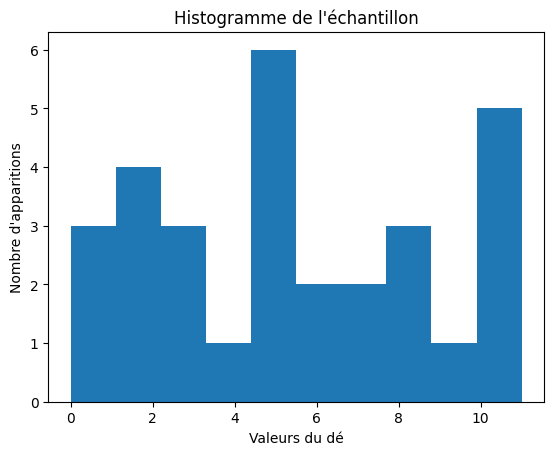

In [19]:
plt.hist(echantillon)
plt.title("Histogramme de l'échantillon")
plt.xlabel("Valeurs du dé")
plt.ylabel("Nombre d'apparitions")
plt.show()

## Analyser des données réelles

La moyenne et la variance sont très importantes lors de l'analyse de données du monde réel. Et le mieux de vous en donner un exemple très concret avec une petite opération de fact checking. 

[Dans cette vidéo](https://www.youtube.com/watch?v=WpKoDq53_Vc&t=640s), Esther Duflo (Prix Nobel d'économie 2021) explique que ce qui est frappant c'est que depuis la fin de la Seconde Guerre mondiale, les Etats-Unis ont connu une croissance économique plutôt robuste, mais que le revenu médian lui, n'a quasimment pas changé. 

### Fact checking de Prix Nobel avec de la data, rien que ça


Allons récupérer des données sur la croissance économique française (via le PIB) sur les revenus moyens des français  : 
* Données sur les revenus moyens des français : https://www.insee.fr/fr/statistiques/5651290?sommaire=5651313
* Données du PIB français : https://www.insee.fr/fr/statistiques/fichier/2830613/econ-gen-pib-composante-niveaux.xlsx


Nous voulons comprendre ce que Esther Duflo explique à propos des Etats-Unis et de la France.

# France


In [76]:
#import as a dataframe the median_france.xlsx file
df3 = pd.read_excel("data/median_france.xlsx")
#delete the first two rows using iloc
df3 = df3.iloc[2:]
#delete the first column using iloc
df3 = df3.iloc[:,1:]
#delete rows with index 2 and 3 using iloc and drop
df3 = df3.drop(df3.index[[2,3]])
#delete all rows with NaN values using dropna
df3 = df3.dropna()
#pivot the dataframe using pivot
df3 = df3.T
#rename column 2 to "annee" and column 3 to "median_revenue"
df3 = df3.rename(columns={2: "annee", 3: "median_revenue(euros 2019)"})
#delete the index
df3 = df3.reset_index(drop=True)
#remove all text in annee column using replace
df3['annee'] = df3['annee'].replace('[^0-9]', '', regex=True)
#set annee to int
df3['annee'] = df3['annee'].astype(int)
#set median_revenue to float
df3['median_revenue(euros 2019)'] = df3['median_revenue(euros 2019)'].astype(float)
#remove rows with columns 15 and 18
df3 = df3.drop([15,18])
print(df3)

    annee  median_revenue(euros 2019)
0    1996                     17850.0
1    1997                     17810.0
2    1998                     18140.0
3    1999                     18370.0
4    2000                     18750.0
5    2001                     19220.0
6    2002                     19730.0
7    2003                     19610.0
8    2004                     19580.0
9    2005                     19830.0
10   2006                     20170.0
11   2007                     20480.0
12   2008                     20890.0
13   2009                     20990.0
14   2010                     20890.0
16   2011                     20730.0
17   2012                     20530.0
19   2013                     20680.0
20   2014                     20740.0
21   2015                     20850.0
22   2016                     21050.0
23   2017                     21120.0
24   2018                     21160.0
25   2019                     21730.0


In [22]:
#charge le fichier excel de cette adresse : https://www.insee.fr/fr/statistiques/fichier/2830613/econ-gen-pib-composante-niveaux.xlsx
df = pd.read_excel("https://www.insee.fr/fr/statistiques/fichier/2830613/econ-gen-pib-composante-niveaux.xlsx")
#supprime les lignes inutiles 
df = df.drop([0,1,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
#fait pivoter le tableau
df = df.T
#delete the index column
df = df.reset_index(drop=True)
#rename the columns 
df.columns = ["annee","PIB"]
#delete the first row
df = df.drop([0])
#row 71, delete '(r)'
df.loc[71, "annee"] = df.loc[71,"annee"].replace("(r)","")
df.loc[72, "annee"] = df.loc[71,"annee"].replace("(r)","")
#transform annee into int
df["annee"] = df["annee"].astype(int)
#transform PIB into float
df["PIB"] = df["PIB"].astype(float)
#join df0 and df on annee
df = df.merge(df0, on="annee")
df

,annee,PIB,"salaire net annuel moyen, (base 1951 en euros constant)"
0,1951,310.358,100
1,1952,320.022,105.079394
2,1953,331.083,108.602481
3,1954,349.552,118.677823
4,1955,368.120,129.952581
...,...,...,...
65,2017,2247.856,375.797114
66,2018,2289.780,376.76824
67,2019,2331.980,379.013761
68,2020,2156.138,362.937674


# Etats Unis

In [47]:
df1 = pd.read_csv('gdp_world.csv')
#filter the dataframe to keep only the rows where the country is USA
df1 = df1[df1['Country Name'] == 'United States']
#pivot the dataframe
df1 = df1.T
#delete the first 4 rows using iloc
df1 = df1.iloc[4:]
#delete the last row using iloc
df1 = df1.iloc[:-1]
#rename the column 0 to 'PIB_USA'
df1 = df1.rename(columns={df1.columns[0]:"PIB_USA"})
#change the column type to float
df1['PIB_USA'] = df1['PIB_USA'].astype(float)
df1['PIB_USA'] = df1['PIB_USA']/1000000000
#affect the index to a new column 'annee'
df1['annee'] = df1.index
#turn the column 'annee' into int
df1['annee'] = df1['annee'].astype(int)

print(df1)

           PIB_USA  annee
1960    543.300000   1960
1961    563.300000   1961
1962    605.100000   1962
1963    638.600000   1963
1964    685.800000   1964
...            ...    ...
2018  20533.057312   2018
2019  21380.976119   2019
2020  21060.473613   2020
2021  23315.080560   2021
2022  25462.700000   2022

[63 rows x 2 columns]


In [86]:
df4 = pd.read_csv('median_income_usa.csv')
#set the column 'Date' to datetime
df4['DATE'] = pd.to_datetime(df4['DATE'])
#only keep the year
df4['DATE'] = df4['DATE'].dt.year
#set to int
df4['DATE'] = df4['DATE'].astype(int)
#rename the column 'DATE' to 'annee'
df4 = df4.rename(columns={df4.columns[0]:"annee"})
#rename the column 'MEHOINUSA672N' to 'median_income_usa'
df4 = df4.rename(columns={df4.columns[1]:"median_income_usa"})
print(df4)

    annee  median_income_usa
0    1984              56780
1    1985              57860
2    1986              60010
3    1987              60760
4    1988              61210
5    1989              62260
6    1990              61500
7    1991              59710
8    1992              59210
9    1993              58920
10   1994              59550
11   1995              61440
12   1996              62350
13   1997              63640
14   1998              65980
15   1999              67650
16   2000              67470
17   2001              66360
18   2002              65820
19   2003              65860
20   2004              65760
21   2005              66780
22   2006              67520
23   2007              68610
24   2008              66280
25   2009              65850
26   2010              64300
27   2011              63350
28   2012              63350
29   2013              65740
30   2014              64900
31   2015              68410
32   2016              70840
33   2017     

# Comparison

In [92]:
# join df23, df, df1 and df4 on annee
df23 = df3.merge(df, on="annee")
df23 = df23.merge(df1, on="annee")
df23 = df23.merge(df4, on="annee")

#rename the column 'median_revenue(euros 2019)' to 'median_revenue_france(euros 2019)' and median_income_usa to 'median_income_usa(dollars 2021)'
df23 = df23.rename(columns={df23.columns[1]:"median_revenue_france(euros 2019)", df23.columns[5]:"median_income_usa(dollars 2021)"})

#rename PIB to 'PIB_france'
df23 = df23.rename(columns={df23.columns[2]:"PIB_france"})

#delete colmun 3
df23 = df23.drop(df23.columns[[3]], axis=1)

#reset the order of the columns
df23 = df23[['annee', 'median_revenue_france(euros 2019)', 'PIB_france','PIB_USA', 'median_income_usa(dollars 2021)']]
df23

,annee,median_revenue_france(euros 2019),PIB_france,PIB_USA,median_income_usa(dollars 2021)
0,1996,17850.0,1600.653,8073.122000,62350
1,1997,17810.0,1638.049,8577.554457,63640
2,1998,18140.0,1696.833,9062.818202,65980
3,1999,18370.0,1754.888,9631.174489,67650
4,2000,18750.0,1823.744,10250.947997,67470
5,2001,19220.0,1859.922,10581.929774,66360
6,2002,19730.0,1881.042,10929.112955,65820
7,2003,19610.0,1896.526,11456.442041,65860
8,2004,19580.0,1950.193,12217.193198,65760
9,2005,19830.0,1982.629,13039.199193,66780


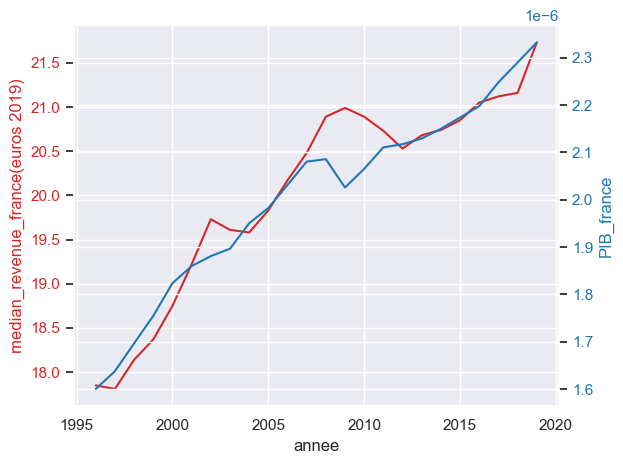

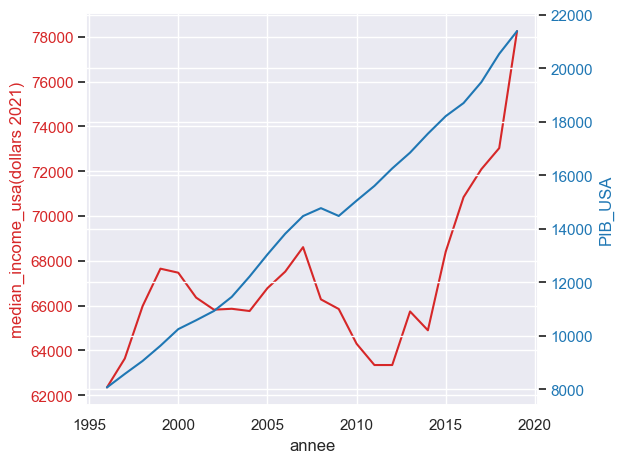

In [108]:
#plot a two scale graph so we can compare the evolution of PIB and revenue moyen in France and th
import seaborn as sns
sns.set_theme(style="paper")
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('annee')
ax1.set_ylabel('median_revenue_france(euros 2019)', color=color)
ax1.plot(df23['annee'], df23['median_revenue_france(euros 2019)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('PIB_france', color=color)
ax2.plot(df23['annee'], df23['PIB_france'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()
#do the same for USA and show the two graphs side by side
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('annee')
ax1.set_ylabel('median_income_usa(dollars 2021)', color=color)
ax1.plot(df23['annee'], df23['median_income_usa(dollars 2021)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('PIB_USA', color=color)
ax2.plot(df23['annee'], df23['PIB_USA'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()


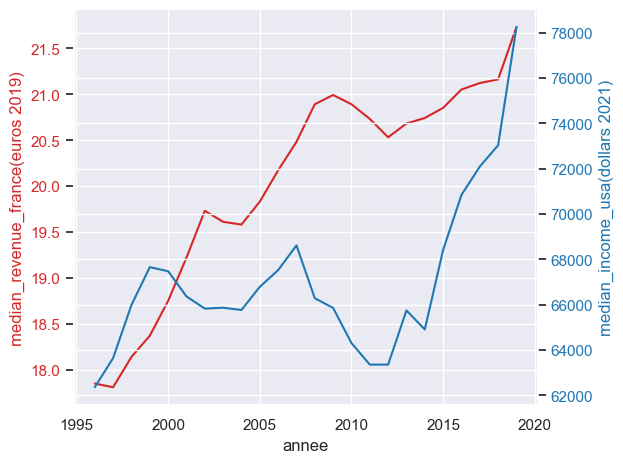

In [107]:
#make a two scale graph with the evolution of the median revenue in France and the median income in USA
#use a surprise library to make the graph more beautiful
import seaborn as sns
sns.set_theme(style="darkgrid")
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('annee')
ax1.set_ylabel('median_revenue_france(euros 2019)', color=color)
ax1.plot(df23['annee'], df23['median_revenue_france(euros 2019)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('median_income_usa(dollars 2021)', color=color)
ax2.plot(df23['annee'], df23['median_income_usa(dollars 2021)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()



> We are using a package called [**Pandas**](https://pandas.pydata.org/) here for data analysis. We will talk more about Pandas and working with data in Python later in this course.

Let's compute average values for age, height and weight:

In [5]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height     73.697292
Weight    201.689255
dtype: float64

Now let's focus on height, and compute standard deviation and variance: 

In [6]:
print(list(df['Height'])[:20])

[74, 74, 72, 72, 73, 69, 69, 71, 76, 71, 73, 73, 74, 74, 69, 70, 72, 73, 75, 78]


In [7]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 73.6972920696325
Variance = 5.316798081118074
Standard Deviation = 2.3058183105175645


In addition to mean, it makes sense to look at the median value and quartiles. They can be visualized using a **box plot**:

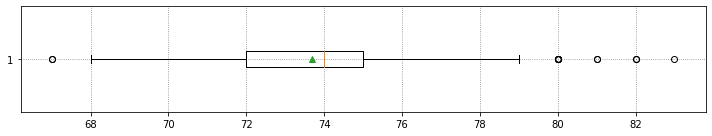

In [8]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

We can also make box plots of subsets of our dataset, for example, grouped by player role.

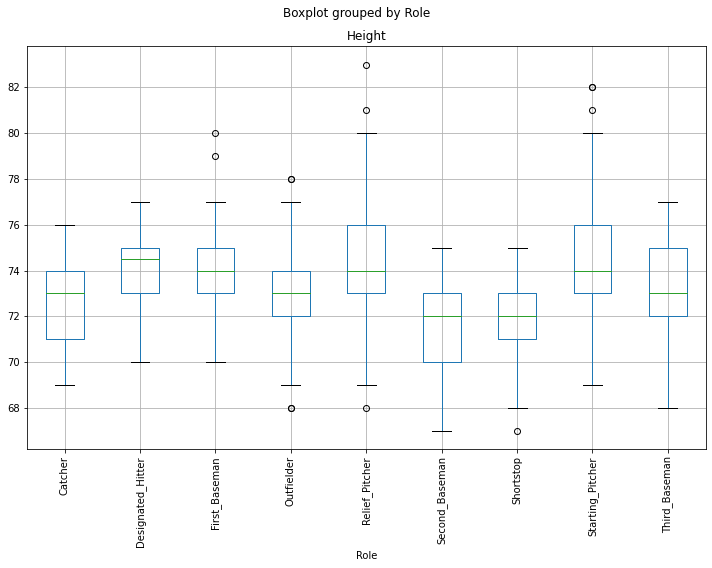

In [9]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Note**: This diagram suggests, that on average, the heights of first basemen are higher than heights of second basemen. Later we will learn how we can test this hypothesis more formally, and how to demonstrate that our data is statistically significant to show that.  

Age, height and weight are all continuous random variables. What do you think their distribution is? A good way to find out is to plot the histogram of values: 

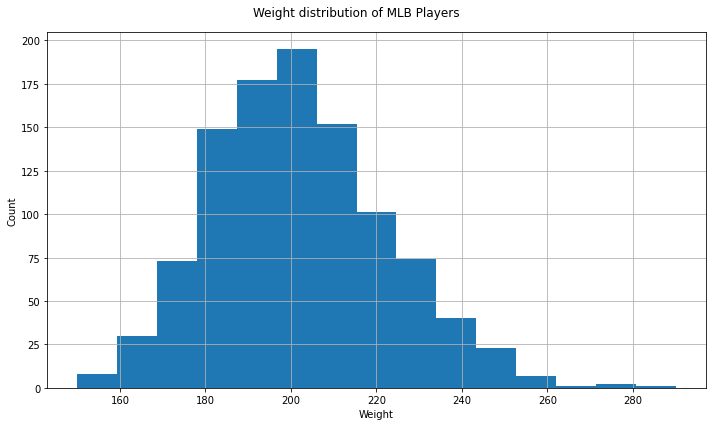

In [10]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Normal Distribution

Let's create an artificial sample of weights that follows a normal distribution with the same mean and variance as our real data:

In [11]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([73.46072234, 70.40678311, 70.23689776, 73.81190675, 72.41091792,
       76.00127651, 71.91641414, 77.18162239, 76.7173353 , 73.93996587,
       74.2862748 , 76.88034696, 72.15184905, 74.43537605, 76.37723417,
       65.66976051, 74.3200533 , 77.3235274 , 72.8840488 , 77.50300255])

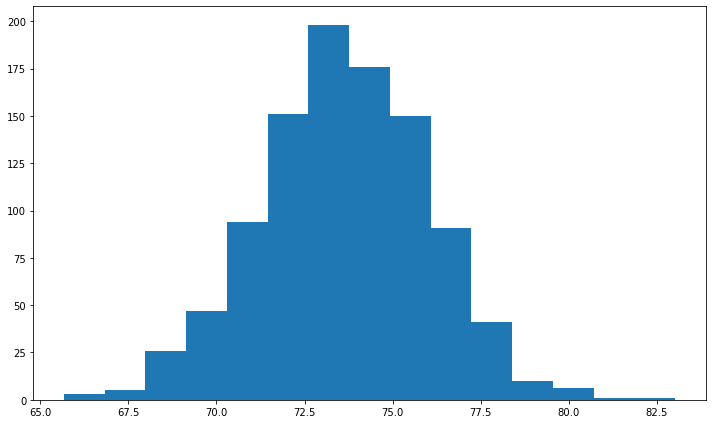

In [12]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

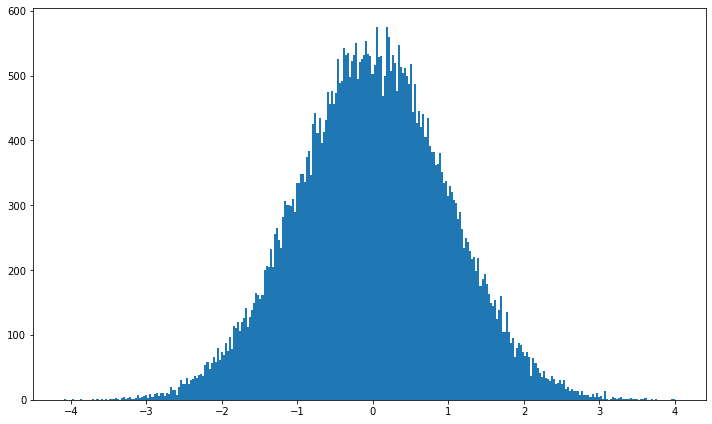

In [13]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Since most values in real life are normally distributed, we should not use a uniform random number generator to generate sample data. Here is what happens if we try to generate weights with a uniform distribution (generated by `np.random.rand`):

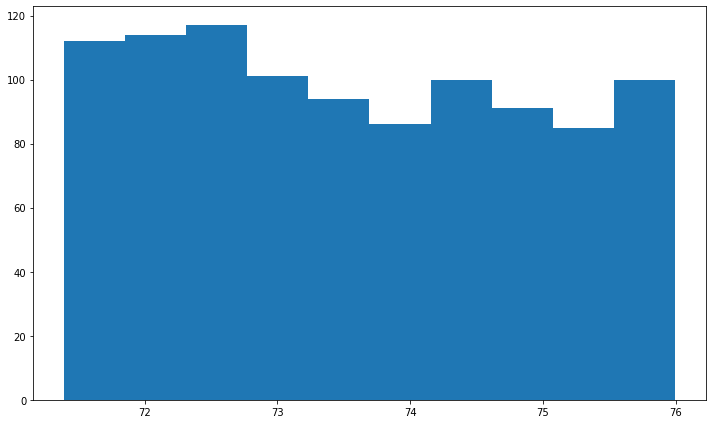

In [14]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Confidence Intervals

Let's now calculate confidence intervals for the weights and heights of baseball players. We will use the code [from this stackoverflow discussion](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):

In [15]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 201.73 ± 0.94
p=0.90, mean = 201.73 ± 1.08
p=0.95, mean = 201.73 ± 1.28


## Hypothesis Testing

Let's explore different roles in our baseball players dataset:

In [16]:
df.groupby('Role').agg({ 'Height' : 'mean', 'Weight' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

,Height,Weight,Count
Role,,,
Catcher,72.723684,204.328947,76
Designated_Hitter,74.222222,220.888889,18
First_Baseman,74.000000,213.109091,55
Outfielder,73.010309,199.113402,194
Relief_Pitcher,74.374603,203.517460,315
Second_Baseman,71.362069,184.344828,58
Shortstop,71.903846,182.923077,52
Starting_Pitcher,74.719457,205.163636,221
Third_Baseman,73.044444,200.955556,45


Let's test the hypothesis that First Basemen are taller than Second Basemen. The simplest way to do this is to test the confidence intervals:

In [17]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 73.62..74.38, 2nd basemen height: 71.04..71.69
Conf=0.90, 1st basemen height: 73.56..74.44, 2nd basemen height: 70.99..71.73
Conf=0.95, 1st basemen height: 73.47..74.53, 2nd basemen height: 70.92..71.81


We can see that the intervals do not overlap.

A statistically more correct way to prove the hypothesis is to use a **Student t-test**:

In [18]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 7.65
P-value: 9.137321189738925e-12


The two values returned by the `ttest_ind` function are:
* p-value can be considered as the probability of two distributions having the same mean. In our case, it is very low, meaning that there is strong evidence supporting that first basemen are taller.
* t-value is the intermediate value of normalized mean difference that is used in the t-test, and it is compared against a threshold value for a given confidence value.

## Simulating a Normal Distribution with the Central Limit Theorem

The pseudo-random generator in Python is designed to give us a uniform distribution. If we want to create a generator for normal distribution, we can use the central limit theorem. To get a normally distributed value we will just compute a mean of a uniform-generated sample.

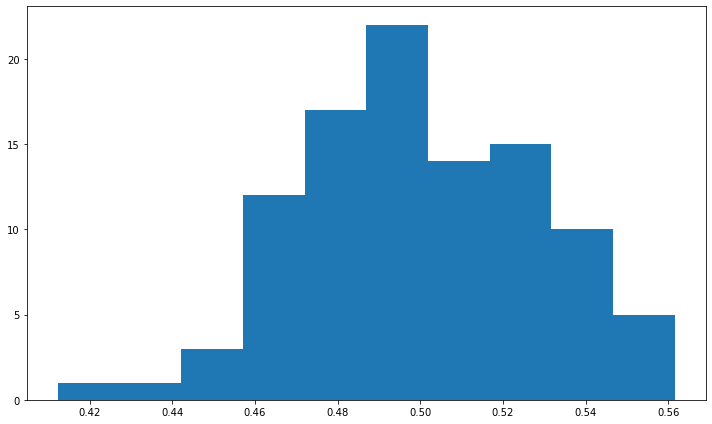

In [19]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Correlation and Evil Baseball Corp

Correlation allows us to find relations between data sequences. In our toy example, let's pretend there is an evil baseball corporation that pays its players according to their height - the taller the player is, the more money he/she gets. Suppose there is a base salary of $1000, and an additional bonus from $0 to $100, depending on height. We will take the real players from MLB, and compute their imaginary salaries:

In [20]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(74, 1075.2469071629068), (74, 1075.2469071629068), (72, 1053.7477908306478), (72, 1053.7477908306478), (73, 1064.4973489967772), (69, 1021.4991163322591), (69, 1021.4991163322591), (71, 1042.9982326645181), (76, 1096.746023495166), (71, 1042.9982326645181)]


Let's now compute covariance and correlation of those sequences. `np.cov` will give us a so-called **covariance matrix**, which is an extension of covariance to multiple variables. The element $M_{ij}$ of the covariance matrix $M$ is a correlation between input variables $X_i$ and $X_j$, and diagonal values $M_{ii}$ is the variance of $X_{i}$. Similarly, `np.corrcoef` will give us the **correlation matrix**.

In [21]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[  5.31679808  57.15323023]
 [ 57.15323023 614.37197275]]
Covariance = 57.153230230544736
Correlation = 1.0


A correlation equal to 1 means that there is a strong **linear relation** between two variables. We can visually see the linear relation by plotting one value against the other:

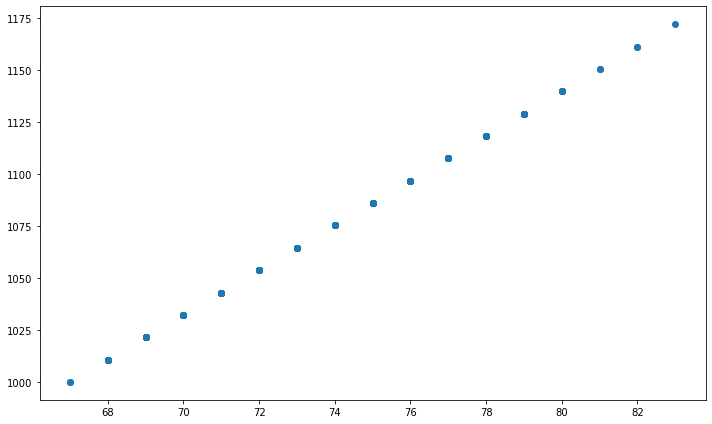

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

Let's see what happens if the relation is not linear. Suppose that our corporation decided to hide the obvious linear dependency between heights and salaries, and introduced some non-linearity into the formula, such as `sin`:

In [23]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9835304456670837


In this case, the correlation is slightly smaller, but it is still quite high. Now, to make the relation even less obvious, we might want to add some extra randomness by adding some random variable to the salary. Let's see what happens:

In [24]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9363097848296155


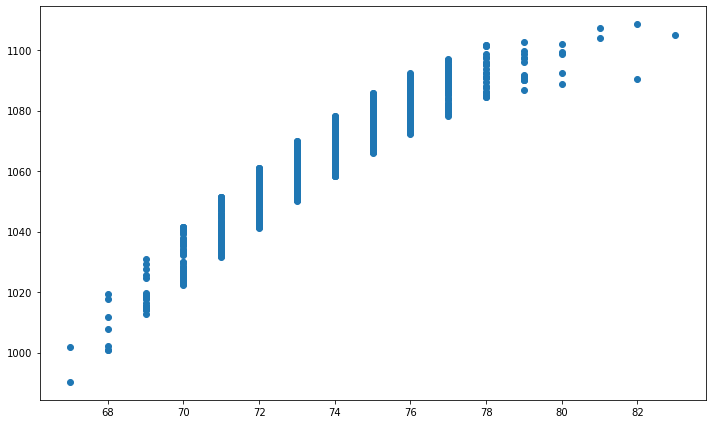

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Can you guess why the dots line up into vertical lines like this?

We have observed the correlation between an artificially engineered concept like salary and the observed variable *height*. Let's also see if the two observed variables, such as height and weight, correlate too:

In [26]:
np.corrcoef(df['Height'],df['Weight'])

array([[ 1., nan],
       [nan, nan]])

Unfortunately, we did not get any results - only some strange `nan` values. This is due to the fact that some of the values in our series are undefined, represented as `nan`, which causes the result of the operation to be undefined as well. By looking at the matrix we can see that `Weight` is the problematic column, because self-correlation between `Height` values has been computed.

> This example shows the importance of **data preparation** and **cleaning**. Without proper data we cannot compute anything.

Let's use `fillna` method to fill the missing values, and compute the correlation: 

In [27]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

There is indeed a correlation, but not such a strong one as in our artificial example. Indeed, if we look at the scatter plot of one value against the other, the relation would be much less obvious:

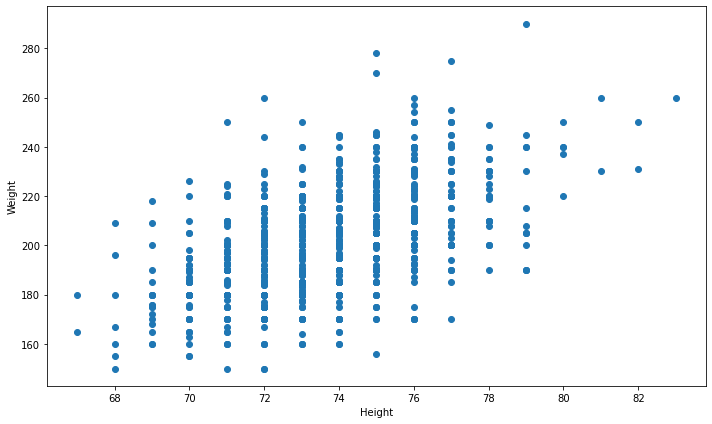

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.tight_layout()
plt.show()

## Conclusion

In this notebook we have learnt how to perform basic operations on data to compute statistical functions. We now know how to use a sound apparatus of math and statistics in order to prove some hypotheses, and how to compute confidence intervals for arbitrary variables given a data sample. 